In [60]:
import numpy as np
import matplotlib.pyplot as plt

import mne
from scipy.stats import ttest_rel, ttest_1samp, ttest_ind, kstest, wilcoxon
import statsmodels.api as sm
import statsmodels.formula.api as smf

import glob
import os

import pickle
import sys

sys.path.append('../utils')
from ERP_utils import *

In [61]:
from statsmodels.stats.anova import AnovaRM 
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

In [62]:
#-----------------------------
#           PARAMETERS
#-----------------------------

good_listen_subjects = ['01', '02', '04', '05', '06', '07', '08', '09', '10', '11', '12']
good_motor_subjects = ['01', '04', '05', '06', '07', '08', '09', '10', '11', '12']
nonmusicians = ['01', '04', '05', '08', '09', '10', '11']
musicians = ['02', '06', '07', '12']


task = 'motor'


if task == 'listen':
    subjects_to_process = good_listen_subjects
    mus_idx = [1, 4, 5, 10] #edit this - it wont be the same for motor subjects
    nmus_idx = [0,2,3,5,6,7, 8, 9]

elif task == 'motor':
    subjects_to_process = good_motor_subjects
    mus_idx = [3, 4, 9]
    nmus_idx = [0, 1, 2, 5, 6, 7, 8]

In [63]:
#-----------------------------
#           DIRECTORIES
#-----------------------------

evoked_dir = f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_{task}/{task}_ERP_data'
epochs_dir = f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_{task}/{task}_epochs_data'
figs_dir = '/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/figures'

#get channel names
with open('../utils/ch_names.pkl', 'rb') as file:
    ch_names_all = pickle.load(file)

ch_names_72 = ch_names_all[0:72]
downfreq = 128

In [64]:
#-----------------------------
#           GROUPING EVOKEDS
#-----------------------------

evoked_list_pre = []
epochs_list_pre = []
evoked_list_post = []
epochs_list_post = []

#subject averages
epochs_list_pre_sa =[]

#for file in sorted(os.listdir(evoked_dir)):

for subject in subjects_to_process:
    print('Processing subject: ', subject)

    file_evokeds_pre = glob.glob(os.path.join(evoked_dir, f'{task}_ERP_pre_{subject}.fif'))[0]
    file_epochs_pre = glob.glob(os.path.join(epochs_dir, f'{task}_epochs_pre_{subject}.fif'))[0]
  
    evoked_pre = mne.read_evokeds(file_evokeds_pre)[0]
    evoked_list_pre.append(evoked_pre)
    epochs_pre = mne.read_epochs(file_epochs_pre)
    epochs_list_pre.append(epochs_pre)

    file_evokeds_post = glob.glob(os.path.join(evoked_dir, f'{task}_ERP_post_{subject}.fif'))[0]
    file_epochs_post = glob.glob(os.path.join(epochs_dir, f'{task}_epochs_post_{subject}.fif'))[0]
  
    evoked_post = mne.read_evokeds(file_evokeds_post)[0]
    evoked_list_post.append(evoked_post)
    epochs_post = mne.read_epochs(file_epochs_post)
    epochs_list_post.append(epochs_post)


concat_epochs_pre = mne.concatenate_epochs(epochs_list_pre)
concat_evoked_pre = mne.combine_evoked(evoked_list_pre, weights = 'equal')

concat_epochs_post = mne.concatenate_epochs(epochs_list_post)
concat_evoked_post = mne.combine_evoked(evoked_list_post, weights = 'equal')


Processing subject:  01
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_pre_01.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 353 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_01.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
353 matching events found
No baseline correction applied
0 projection items activated


Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_post_01.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 385 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_post_01.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
385 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  04
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_pre_04.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms 

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_27650/1353575689.py:21: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_pre_01.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_pre = mne.read_evokeds(file_evokeds_pre)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_27650/1353575689.py:23: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_01.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_pre = mne.read_epochs(file_epochs_pre)
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_27650/1353575689.py:29: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/moto

No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_post_04.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
525 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  05
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_pre_05.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 245 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_27650/1353575689.py:31: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_post_04.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_post = mne.read_epochs(file_epochs_post)
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_27650/1353575689.py:21: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_pre_05.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_pre = mne.read_evokeds(file_evokeds_pre)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_27650/1353575689.py:23: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_dat

    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 277 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_post_07.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
277 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  08
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_pre_08.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 255 - aspect type = 100
No projector specified for thi

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_27650/1353575689.py:31: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_post_07.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_post = mne.read_epochs(file_epochs_post)
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_27650/1353575689.py:21: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_pre_08.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_pre = mne.read_evokeds(file_evokeds_pre)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_27650/1353575689.py:23: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_dat

0 projection items activated
Processing subject:  11
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_pre_11.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 323 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_11.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
323 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_post_11.fif ...
    Found the data of interest:
        t =  

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_27650/1353575689.py:21: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_pre_11.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_pre = mne.read_evokeds(file_evokeds_pre)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_27650/1353575689.py:23: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_11.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_pre = mne.read_epochs(file_epochs_pre)
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_27650/1353575689.py:29: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/moto

Not setting metadata
3168 matching events found
Applying baseline correction (mode: mean)


### Experiment-specific parameters

In [70]:
#choosing the timepoint to run ANOVA over
timepoint  = -0.05
erp_times = concat_epochs_post.times
time_idx = min(range(len(erp_times)), key=lambda i: abs(erp_times[i] - timepoint))

#channels to average over
p_channels = ['Cz', 'FCz']
eeg_channels = ch_names_72[0:64]
p_ch_idx = ch_index(p_channels)

In [71]:
""" 

Takes a list of epochs (with data from all subjects), the list of subjects to include expressed as indices, and timestep to calculate on
Finds the eeg voltage at a certain timepoint, averaged over trials and all channels
Returns one value per subject
"""
"""def ep_slices(epochs_list, subject_list, time_idx):
    ep_slices = []
    for i in subject_list:
        epoch_curr = epochs_list[i].get_data()[:,0:64, time_idx]
        mean_epoch = epoch_curr.mean(axis = (0,1)) #ave over trials and channels. fix this to handle different ch combinations
        ep_slices.append(mean_epoch)
    return ep_slices
"""

#this version also adds the name of the subject

def ep_slices(epochs_list, subject_list, time_idx):
    ep_slices = []
    for i, subject in enumerate(subject_list):
        epoch_curr = epochs_list[subject].get_data()[:, p_ch_idx, time_idx]
        mean_epoch = epoch_curr.mean(axis=(0, 1))  # Average over trials and channels.
        # Concatenate subject column with mean_epoch array
        ep_slices.append([int(subject), mean_epoch])
    ep_slices = np.array(ep_slices)
    return ep_slices

mus_pre = ep_slices(epochs_list_pre, mus_idx, time_idx)
mus_post = ep_slices(epochs_list_post, mus_idx, time_idx)
nmus_pre = ep_slices(epochs_list_pre, nmus_idx, time_idx)
nmus_post = ep_slices(epochs_list_post, nmus_idx, time_idx)

In [72]:
#making dataframe for anova
df_1 = pd.DataFrame({'subject': mus_pre[:,0], 'eeg': mus_pre[:,1], 'period': 'pre', 'musician': 1})
df_2 = pd.DataFrame({'subject': mus_post[:,0], 'eeg': mus_post[:,1], 'period': 'post', 'musician': 1})
df_3 = pd.DataFrame({'subject': nmus_pre[:,0], 'eeg': nmus_pre[:,1], 'period': 'pre', 'musician': 0})
df_4 = pd.DataFrame({'subject': nmus_post[:,0], 'eeg': nmus_post[:,1], 'period': 'post', 'musician': 0})
df = pd.concat([df_1, df_2, df_3, df_4])



In [73]:
#mixed-effects model
mixed_model = smf.mixedlm("eeg ~ C(period) * C(musician)", df, groups=df["subject"])
mixed_results = mixed_model.fit()
print(mixed_results.summary())

                   Mixed Linear Model Regression Results
Model:                    MixedLM        Dependent Variable:        eeg     
No. Observations:         20             Method:                    REML    
No. Groups:               10             Scale:                     0.0000  
Min. group size:          2              Log-Likelihood:            206.9713
Max. group size:          2              Converged:                 Yes     
Mean group size:          2.0                                               
----------------------------------------------------------------------------
                                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------
Intercept                         -0.000    0.000 -1.757 0.079 -0.000  0.000
C(period)[T.pre]                  -0.000    0.000 -1.494 0.135 -0.000  0.000
C(musician)[T.1]                   0.000    0.000  1.049 0.294 -0.000  0.000
C(period)[T.pre]:C(

/Users/cindyzhang/anaconda3/envs/eelbrain-cnsp/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/Users/cindyzhang/anaconda3/envs/eelbrain-cnsp/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


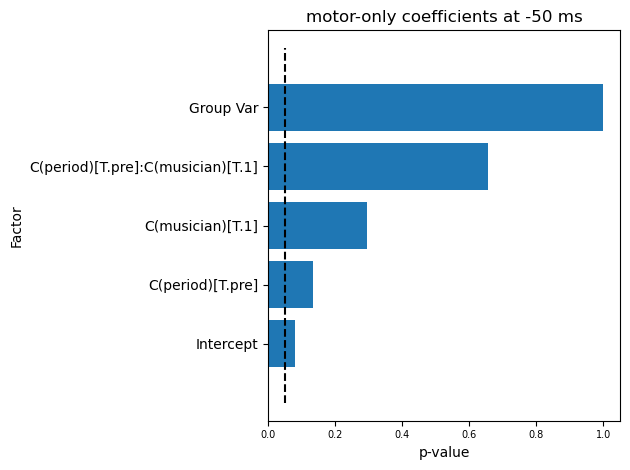

In [74]:
plt.figure()
plt.barh(mixed_results.pvalues.index, mixed_results.pvalues.values)
plt.xlabel('p-value')
plt.ylabel('Factor')
plt.xticks(fontsize = 7)
plt.vlines(0.05, -1, 5, color = 'black', linestyles= '--')
plt.title(f'{task}-only coefficients at {int(timepoint*1000)} ms')
plt.tight_layout()
plt.savefig(f'{figs_dir}/{task}_ME_coefs_{int(timepoint*1000)}.png')